In [4]:
library(tidyverse)
library(ggplot2)
library(magrittr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract



Q0. Write a function that takes a vector and replaced it with the mean of the that vector
  * Let's call that function `replace_na_mean`

  * Try your function using the following snippet:

```
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))
```

In [5]:
replace_na_mean = function(x){
    mean(x, na.rm = TRUE)
}
replace_na_mean(c(1, NA, 2, 3, 2, 2, NA))

[1] 2

Q1. Write a function that returns the sample space for the experiment consisting of samplign a 4 digit PIN
  * Call your function get_all_perms

  * Essentially, your function does not take any arguments but returns the sample space consisting of all the four digit numbers
   
  * The function `expand.grid` expand.grid creates a data frame from all combinations of the supplied vectors or factors. For example:
 
  ```expand.grid(0:1, 0:1, 0:1)```

* generates  

![](https://www.dropbox.com/s/cnlt4fg8rxd01d6/expand.grid.png?dl=1)
 

* Strategy, use `expand.grid` to generate the permutation for four verctation in the range 0:9
  * Return the number of rows in that `data.frame`

  

In [6]:
get_all_perms = function(x){
    perms = expand.grid(0:9, 0:9, 0:9, 0:9)
    dim(perms)[1]
}
get_all_perms()

[1] 10000

Q2. The function above is not very useful since it always computes the same thing, namely the number of possible permutation of digits. One way to make it more useful is by passing as an argument the number of digits to consider, i.e., the number of columns in `expand.grid`. Let;s call that param `size`, which by default should be `4`. For exmaple:

*  `get_all_perms(size = 1 )` will return all the number of size 1 (0-9)
*  `get_all_perms(size = 3 )` will return all the permutations of size 3 (000 - to 999)


* Hint: `expand.grid` requires the number of input parameters to match the permutation length. We need to automate that so that the number of vectors passed as input matches the `size` values passed into `get_all_perms`
  * We can do that using `replicate`
  * `replicate(2, c(1,2,3), simplify=FALSE)` will repeat the vector `c(1,2,3)` twice
    * We need to pass `replicate` the value `simplify=FALSE` so that it does not convert the output for us into a matrix
  * Use pipe (`%>%`) pass the output of `replicate` into expand.grid
  * Make sure replicated generate the correct input for exand.grid
  

In [7]:
get_all_perms  = function(size=4){
    perms = replicate(size, 0:9, simplify=FALSE) %>% 
    expand.grid()
    dim(perms)[1]
}
get_all_perms(4)

[1] 10000

Q3.

* Given a fish disease that occurs with a probability of p= 0.43
* You sampled 340 animals
* How many of these animals should you expect to see the disease in?
* Hint: you will need to compute the probability of each element of the sample space and find the value that has the highest probability

In [8]:
disease = mapply(dbinom, 0:340, size=340, prob=0.43)
which.max(disease)

[1] 147

Q4. Plot the two following distributions:

$$
x \sim \mathcal{N}(10, 0.5) \\
y \sim \mathcal{N}(10.2, 0.5) \\
$$

* Do you think the two distribtions are differnet?


* Draw 40 values from the first distribution and store them in a variable called `x_sample`
* Draw 40 values from the second distribution and store them in a variable called `y_sample`
  * make sure you run the following line before you sample data
  ```set.seed(42)```
 
* Do a `t-`test to compute the `x_sample` and `y_sample`
  * A `t-`test compares two vectors of values and predicts if the two vectors are from the same distribution
  * The format for the t-test in R is
 
 `t.test(x,y)` where `x` an `y` are the values we would like to compare.
  * Look at the `p-value`, if it's smaller than say 0.05, then there is a statistically significant difference between the two datasets.

* Does the t-test agree with your conclusion?

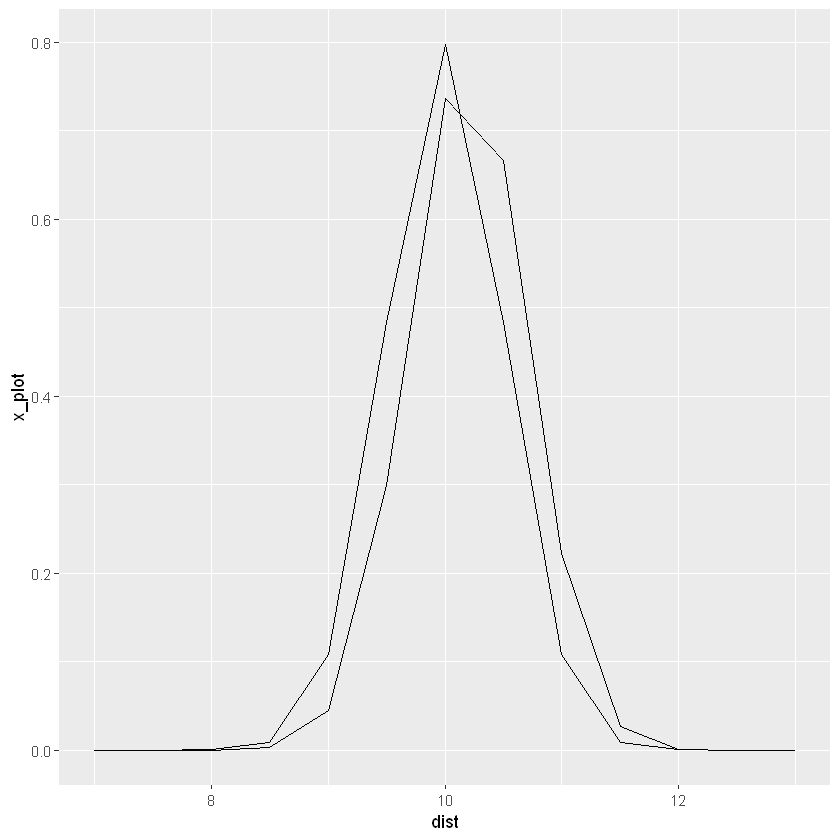

In [9]:
dist = seq(7, 13, 0.5)
x_plot = mapply(dnorm, dist, mean = 10, sd = 0.5)
y_plot = mapply(dnorm, dist, mean = 10.2, sd = 0.5)
ggplot() + 
  geom_line(aes(x=dist, y=x_plot)) +
  geom_line(aes(x=dist, y=y_plot)) 

In [10]:
#I don't think there is a statistically significant difference between the two distributions.

In [11]:
x_sample = rnorm(40, mean = 10, sd = 0.5)
y_sample = rnorm(40, mean = 10.2, sd = 0.5)
t.test(x_sample, y_sample)


	Welch Two Sample t-test

data:  x_sample and y_sample
t = -0.95958, df = 74.66, p-value = 0.3404
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2931424  0.1025528
sample estimates:
mean of x mean of y 
 10.12038  10.21567 


In [ ]:
#p-value is not less than 0.05.
#The t-test agrees with my conclusion. There is not a statistically significant difference between the two distributions.

Q5. Challenge

* We have used the function `dnorm` to plot the bell-shaped curve.
* given a distribution $ x \sim \mathcal{N}(10, 0.5)$, sum the values along the x-axis
  * Use seq(5, 15, 0.05) to generate the x-axis values
  * What do you notice?
  * How do you fix that?


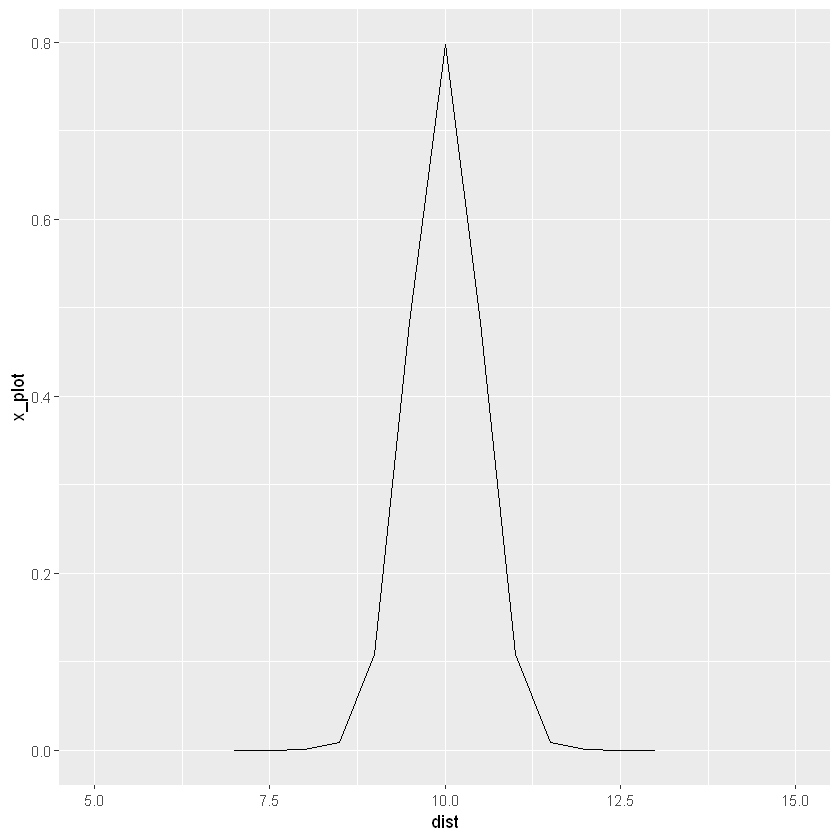

In [24]:
x_axis = seq(5, 15, 0.05)
x_curve = mapply(dnorm, dist, mean = 10, sd = 0.5)
ggplot() + 
    geom_line(aes(x=dist, y=x_plot)) +
    xlim(5, 15)

In [25]:
sum(x_axis)

[1] 2010